# Polynomial Regression

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x), and has been used to describe nonlinear phenomena such as the growth rate of tissues, the distribution of carbon isotopes in lake sediments, and the progression of disease epidemics.

## Example

In this example we will be using the story below.

"In Chicago, a company is looking for a regional manager with a couple of years of experience. They are currently interviewing a canidate who says he worked as a Regional manager for his last company for 2 years. He claims to have made near 160,000 dollars annually at his last job. HR wants to investigate to make sure they are not overpaying for a new employee so they commission you to use a ML Algorithim to predict what the new employees salary should be, based of a sheet of position level, and position salary.

## Step one: Importing the Libraries and Datasets

Inside of step one we are going to import all the data we need to work with, then also set our matrix(x) and vectors (y).

While setting your x Variable, make sure to use a range 1:2 as the column you want so it sets x as your matrix and so you don't encounter problems later.

In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [8]:
print(dataset)

print (x)

print(y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Step Two: Creating and Fitting the models with the dataset

We will be creating two models, one Linear Regression model as well as one Polynomial regression model so we can see the differences of methods.

### Linear Regression model

First we will fit our Linear Model with information from the data set.

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y);

### Next we will visualise our results


Text(0,0.5,'Salary')

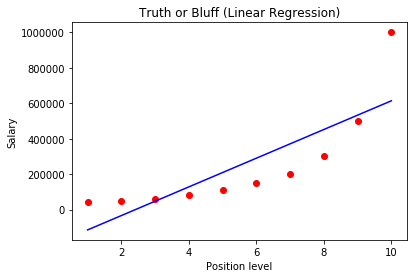

In [10]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color='blue')
plt.title('Truth or Bluff (Linear Regression)' )
plt.xlabel('Position level')
plt.ylabel('Salary')

### That can't be right.... can it ?

As you can see our results show that our test data (points in the red) are no where really close to our prediction (Blue line).
This is due to the points not being linear but exponential because of salary being increased heavily due to position. In fact if we were to take this data as true as it is now, the incoming employee would have a projected salary of around 330,000 USD! Which is more than twice of his stated income. HR decides that this can't be right and the method we used is incorrect. They tell you to refit the model with a Polynomial regression model.

### Polynomial regression model

#### Fitting the data

Below we will be importing a library that helps with polynomial functions called `PolynomialFeatures`.

The Polynomial import takes our list of matrixes (x) and transforms 
them into our original matrix as well as adding x to the power of whatever variable we insert.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Visulising the Polynomial Regression Results

Below we create an x_grid variable to put all of the exponents matrixes into one variable to give us a more accurate graph then we map it like before.

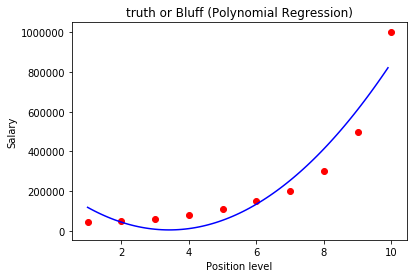

In [12]:
x_grid = np.arange(min(x), max(x), 0.1 )
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color='blue')
plt.title('truth or Bluff (Polynomial Regression)' )
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Results

As we can see, our prediction is now closer but we can still make it more accurate. When first choosing what degree to multiply X to it seems we chose too small of a number so lets try it again with a bigger number and see how it changes our results.

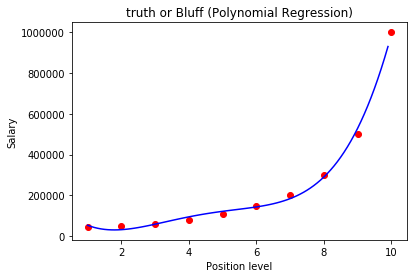

In [13]:
from sklearn.preprocessing import PolynomialFeatures

#We changed the degree from 2 to 4
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

x_grid = np.arange(min(x), max(x), 0.1 )
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color='blue')
plt.title('truth or Bluff (Polynomial Regression)' )
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Result

Our end result using the polynomial graph is much more exact due to it's ability to being able to graph nonlinear equations but more so exponential ones. We can see that our machines predictions is very accurate and close to that of the test data. As one last step, I'd like to compare both of the graphs and then have our machine do a prediction of what the newcome employee should be earning.

Below we will use `Blue` for our linear predictions and `Green` for our polynomial predictions.

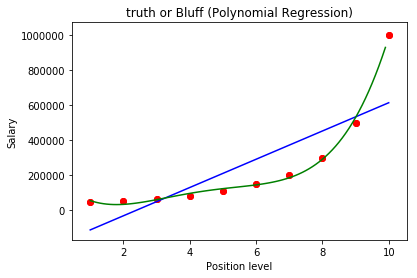

In [14]:
#fitting Linear Regression Model to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y);

#Fitting Polynomial Regression Model to the dataset
# The Polynomial import takes our list of matrixes (x) and transforms 
# them into our original matrix as well as adding x to the power of whatever variable we insert.
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

#Visulising the Linear Regression Results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color='blue')
plt.title('truth or Bluff (Linear Regression)' )
plt.xlabel('position level')
plt.ylabel('Salary')

#Visulising the Polynomial Regression Results
x_grid = np.arange(min(x), max(x), 0.1 )
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color='green')
plt.title('truth or Bluff (Polynomial Regression)' )
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

And last thing we will do is predict the actual salary the new employee should be getting using data from each graph.



In [18]:
#Predicting a new result with Linear Regression
lin_reg.predict(6.5)

array([330378.78787879])

In [21]:
#Prediciting a result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([158862.45265153])

In [ ]:
And there you have it ! It seems as though the potential employee was indeed telling the truth about his salary .